In [32]:
import pandas as pd
import numpy as np
categorical = pd.Series(["black"]*50 + ["white"]*60 + ["asian"]*70)
num_points = categorical.size


def line_with_random_deviations(slope, intercept, num_points):
    x = np.random.randint(100, size=num_points)
    y = slope*x + intercept + np.random.normal(size=num_points)
    return x, y 

black_line_x, black_line_y = line_with_random_deviations(5, 6, 50)
white_line_x, white_line_y = line_with_random_deviations(6, 7, 60)
asian_line_x, asian_line_y = line_with_random_deviations(-7, 7, 70)

x = pd.Series(np.concatenate((black_line_x, white_line_x, asian_line_x)))
y = pd.Series(np.concatenate((black_line_y, white_line_y, asian_line_y)))


data = pd.concat([categorical, x, y], axis=1)
data.columns = ["race", "x", "y"]
data.head()

,race,x,y
0,black,40,205.408501
1,black,58,294.558553
2,black,14,76.317834
3,black,58,295.493593
4,black,97,489.448443


In [33]:
data = pd.get_dummies(data)
data.head



<bound method NDFrame.head of       x           y  race_asian  race_black  race_white
0    40  205.408501           0           1           0
1    58  294.558553           0           1           0
2    14   76.317834           0           1           0
3    58  295.493593           0           1           0
4    97  489.448443           0           1           0
5    94  475.084669           0           1           0
6    41  211.047804           0           1           0
7    75  380.494940           0           1           0
8    71  361.215059           0           1           0
9    32  165.407282           0           1           0
10   81  411.016730           0           1           0
11   98  497.538109           0           1           0
12    5   30.311695           0           1           0
13   47  242.337425           0           1           0
14   16   85.765323           0           1           0
15    7   38.912231           0           1           0
16   27  139.41988

In [34]:
### Let's make someone biracial
data.iloc[0,:] # This person is black
# Let's also make them white
data.loc[0,"race_white"] = 1
## Let's store his/her y value for looking up later
y_value = data.loc[0, "y"]
data.loc[:,["race_white", "race_black", "race_asian"]].sum(axis=0) # Notice that we now have 61 black people

race_white    61
race_black    50
race_asian    70
dtype: int64

In [35]:
melted_data = pd.melt(data, id_vars=["x", "y"])
melted_data.head

<bound method NDFrame.head of       x           y    variable  value
0    40  205.408501  race_asian      0
1    58  294.558553  race_asian      0
2    14   76.317834  race_asian      0
3    58  295.493593  race_asian      0
4    97  489.448443  race_asian      0
5    94  475.084669  race_asian      0
6    41  211.047804  race_asian      0
7    75  380.494940  race_asian      0
8    71  361.215059  race_asian      0
9    32  165.407282  race_asian      0
10   81  411.016730  race_asian      0
11   98  497.538109  race_asian      0
12    5   30.311695  race_asian      0
13   47  242.337425  race_asian      0
14   16   85.765323  race_asian      0
15    7   38.912231  race_asian      0
16   27  139.419881  race_asian      0
17   87  441.229742  race_asian      0
18   21  111.938416  race_asian      0
19   35  181.580671  race_asian      0
20   60  306.279533  race_asian      0
21   83  420.986506  race_asian      0
22   74  376.212196  race_asian      0
23   50  256.651257  race_asian   

In [36]:
# Filter Out all the 0 values (aka this person doesn't identity with this race)
melted_data = melted_data.loc[melted_data.loc[:,"value"] == 1]

In [37]:
## Let's check that our biracial person shows up twice
melted_data.loc[melted_data.loc[:,"y"] == y_value]

,x,y,variable,value
180,40,205.408501,race_black,1
360,40,205.408501,race_white,1


In [39]:
# Let's clean up our melted dataframe
del melted_data["value"] # All 1s now
melted_data.columns = ["x", "y", "race"]

In [40]:
import seaborn as sns
%matplotlib inline


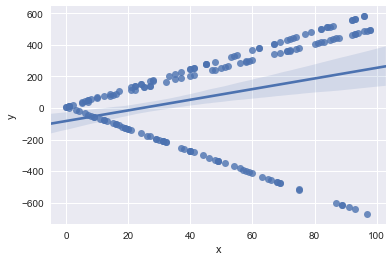

In [41]:
sns.regplot(x="x", y="y", data=data) # No relationships

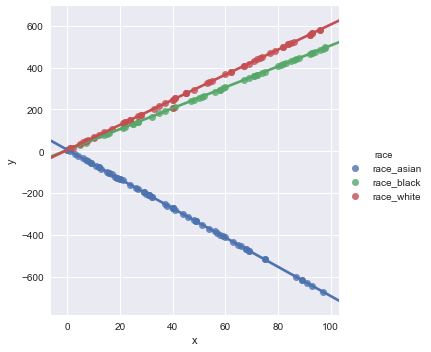

In [44]:
# https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot combines regplot() and FacetGrid to plot multiple linear relationships in a dataset.
sns.lmplot(x="x", y="y", hue="race", data=melted_data)